In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

#%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
import pandas as pd
import seaborn as sns

from lib.lif import LIF, ParamsLIF

Populating the interactive namespace from numpy and matplotlib


In [76]:
dt = 0.001
t = 50
DeltaT = 100
#c = 0.99
c = 0.9
params = ParamsLIF(c = c)
params_orig = ParamsLIF()
lif = LIF(params, t = t)
tau_s = .2

t_filter = np.linspace(0, 1, 2000)
exp_filter = np.exp(-t_filter/tau_s)
exp_filter = exp_filter/np.sum(exp_filter)
ds = exp_filter[0]

In [46]:
rand.seed(42)
(v, h, C, betas, u) = lif.simulate(DeltaT)

In [47]:
#Good timepoints: 1800 (fires late), 2100 (fires), 3200 (fires late), 4000 (almost fires), 4200 (almost fires)

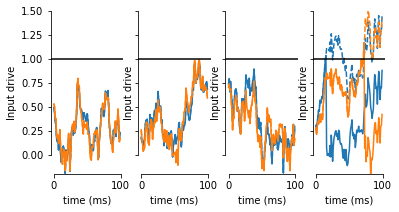

In [49]:
xs = (2000, 100, 20000, 300)
y = 100
fig, axes = plt.subplots(1, len(xs), sharey = True, figsize = (6, 3))

for idx, ax in enumerate(axes):
    x = xs[idx]
    ax.plot(u[0,x:(x+y)], '--C0')
    ax.plot(v[0,x:(x+y)], 'C0')
    ax.plot(u[1,x:(x+y)], '--C1')
    ax.plot(v[1,x:(x+y)], 'C1')
    ax.axhline(y = 1, color = (0,0,0))
    ax.set_ylim([-.2, 1.5])
    ax.set_ylabel('Input drive')
    ax.set_xlabel('time (ms)')
    sns.despine(trim = True, ax = ax)

plt.savefig('fig_1g.pdf')

In [ ]:
#Good times:
#100 (almost spikes)
#300 (does spike, only just over)
#200 (spikes, well over threshold)
#600 (spikes, just over)
#1300 (almost spikes)

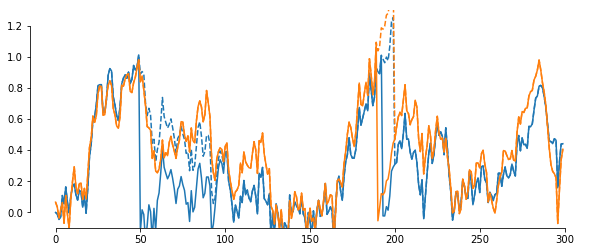

In [75]:
#xs = (10100, 10200)
xs = (10000,)
y = 300
fig, ax = plt.subplots(1, len(xs), sharey = True, figsize = (10, 4))
idx = 0

x = xs[idx]
ax.plot(v[0,x:(x+y)], 'C0')
ax.plot(u[0,x:(x+y)], '--C0')
ax.plot(v[1,x:(x+y)], 'C1')
ax.plot(u[1,x:(x+y)], '--C1')
#plt.axvline(x = 100, color = (0,0,0))
ax.set_ylim([-.1, 1.3])
sns.despine(trim = True)

## Make scatter plot showing causal effect

In [95]:
DeltaT = 20
(v, h, C, betas, u) = lif.simulate(DeltaT)

In [99]:
x = 2
n = 2
alpha1 = -30
alpha2 = 40
cost_fun = lambda s1, s2: (alpha1*s1 + alpha2*s2 - x**2)**2

nB = h.shape[1]/DeltaT

s1 = np.convolve(h[0,:], exp_filter)[0:h.shape[1]]
s2 = np.convolve(h[1,:], exp_filter)[0:h.shape[1]]
cost_s = cost_fun(s1, s2)
cost_r = cost_s.reshape((-1, DeltaT))
cost = np.squeeze(cost_r[:,-1])

#Plot Cost vs max drive in block
ub = np.zeros((n, nB))

for j in range(h.shape[0]):
    u_r = u[j,:].reshape((-1, DeltaT))
    ub[j,:] = np.max(u_r, 1)

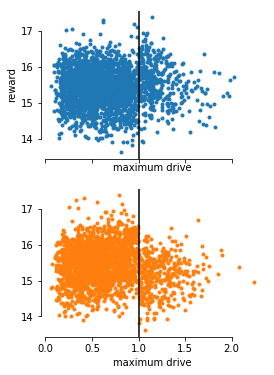

In [108]:
fig, (ax1, ax2) = plt.subplots(2,1,sharex = True, figsize = (4,6))
ax1.plot(ub[0,:], cost, '.C0')
ax1.axvline(x = 1, color=(0,0,0))
ax2.plot(ub[1,:], cost, '.C1')
ax2.axvline(x = 1, color=(0,0,0))
ax1.set_ylabel('reward')
ax1.set_xlabel('maximum drive')
ax2.set_xlabel('maximum drive')
sns.despine(trim= True, ax = ax1)
sns.despine(trim= True, ax = ax2)
plt.savefig('./fig_1h.pdf')

In [106]:
nB

2500